## Task # 1: Explore and understand about the data set. Some of them include, pair pot of features, correlation between features with parameters, mean radius, mean texture, mean perimeter, mean area, mean smoothness.


1. Loading the dataset
2. Exploring the first few rows to understand its structure
3. Generating descriptive statistics of the dataset
4. Creating pair plots of features to visualize relationships between them
5. Checking the correlation between the specified features

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv('Breast_cancer_data.csv')

In [5]:
# Display the first few rows of the dataset
print(data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


The dataset consists of the following columns:

mean_radius: Mean of distances from the center to points on the perimeter of the tumor
mean_texture: Standard deviation of gray-scale values in the tumor image
mean_perimeter: Mean perimeter of the tumor
mean_area: Mean area of the tumor
mean_smoothness: Mean of local variation in radius lengths of the tumor
diagnosis: The classification label (0 = Malignant, 1 = Benign)

In [6]:
# Generate descriptive statistics of the dataset
data_description = data.describe()
print(data_description)

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


The descriptive statistics provide the following insights:


mean_radius:
Range: 6.981 to 28.110

Average: 14.127
Standard Deviation: 3.524

mean_texture:
Range: 9.710 to 39.280

Average: 19.290
Standard Deviation: 4.301

mean_perimeter:
Range: 43.790 to 188.500

Average: 91.969
Standard Deviation: 24.299

mean_area:
Range: 143.5 to 2501.0

Average: 654.889
Standard Deviation: 351.914

mean_smoothness:
Range: 0.05263 to 0.1634

Average: 0.09636
Standard Deviation: 0.01406

diagnosis:
0 (Malignant): 37.26%
1 (Benign): 62.74%

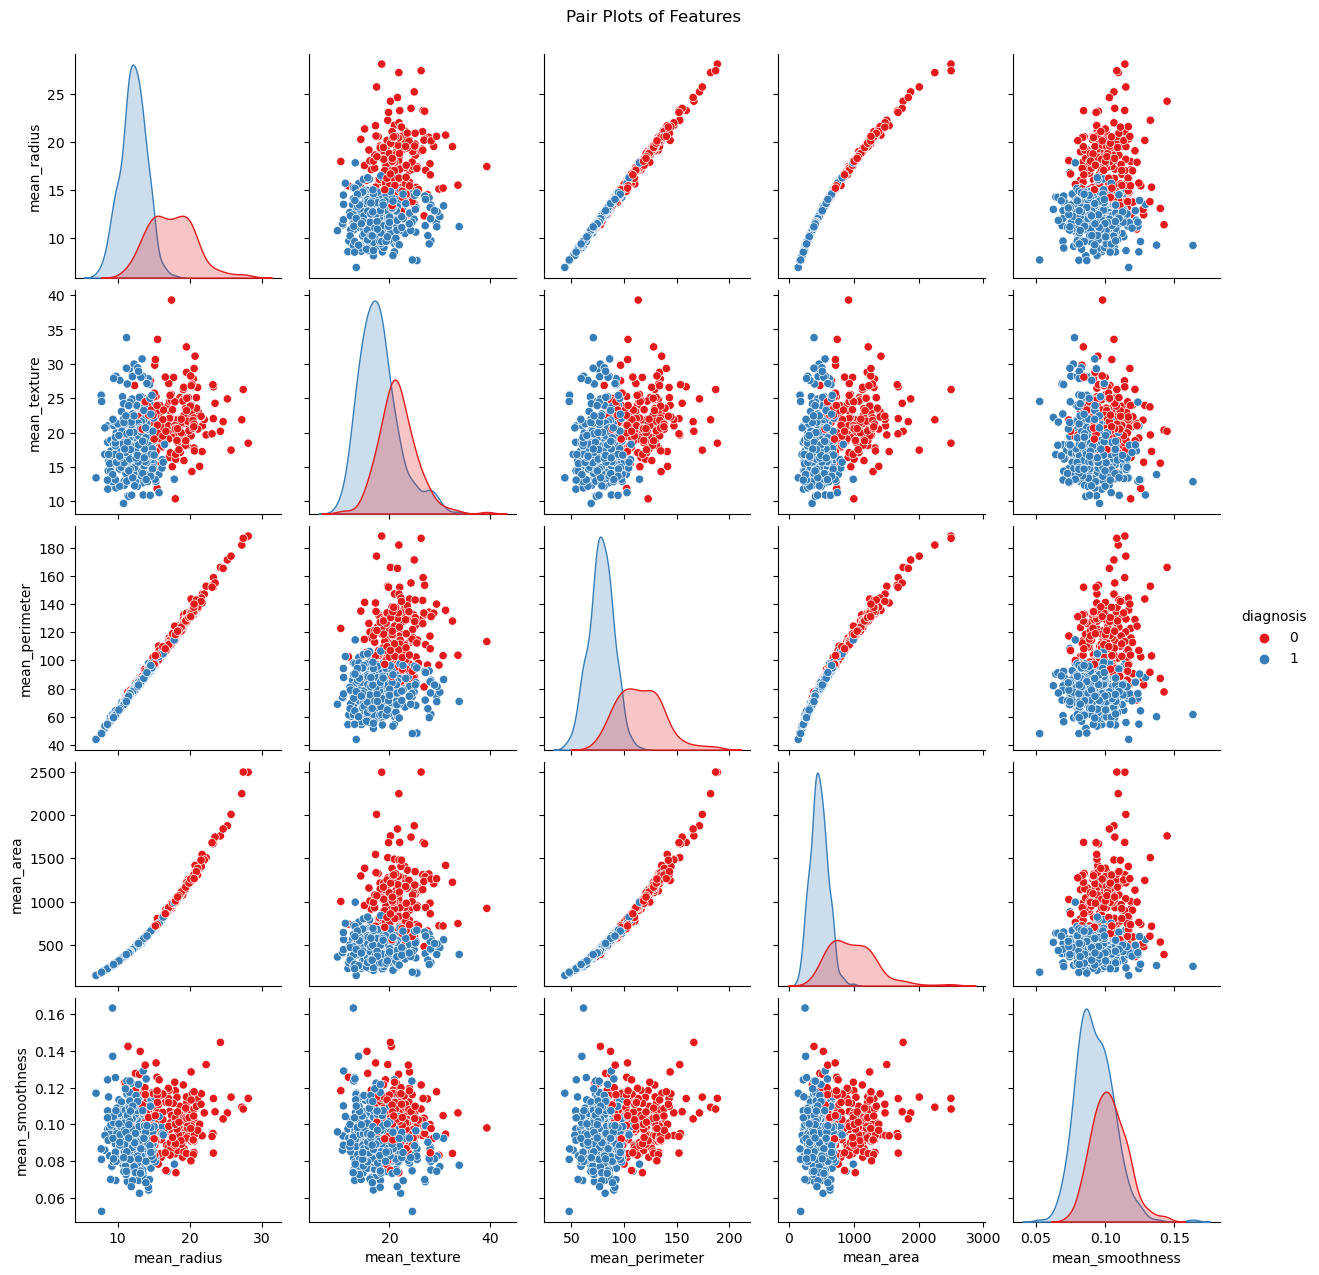

In [7]:
# Create pair plots to visualize the relationships between features
# The pair plots will help understand the distribution of individual features
# as well as the relationships between two features.
cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
sns.pairplot(data[cols], hue='diagnosis', palette='Set1')
plt.suptitle("Pair Plots of Features", y=1.02)
plt.show()

The pair plots offer the following insights:

Distribution of Features: The diagonal of the pair plot provides histograms that represent the distribution of each feature.
Relationship between Features: Scatter plots on the off-diagonal represent the relationship between two features.
Classification: Points are color-coded based on their diagnosis. Blue represents malignant tumors, and red represents benign tumors.
From the plots, we can make a few observations:

The features mean_radius, mean_perimeter, and mean_area have strong linear relationships with each other, as evident from the scatter plots. This is expected because the perimeter and area of a tumor are directly related to its radius.

mean_smoothness doesn't seem to have a clear linear relationship with the other features.

There's a clear distinction in certain plots between malignant and benign tumors, which suggests that these features can be useful for classification.

In [9]:

# Compute the correlation matrix to quantify the relationships between features
# Correlation coefficients range between -1 and 1
# Values close to 1 indicate a strong positive correlation, 
# values close to -1 indicate a strong negative correlation, 
# and values close to 0 indicate a weak or no correlation.
correlation_matrix = data[cols].corr()
print(correlation_matrix)


                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


The correlation matrix provides the following insights:

mean_radius, mean_perimeter, and mean_area:
These features are strongly correlated with each other, with correlation coefficients close to 1. This is expected, as the perimeter and area of a tumor are directly related to its radius.
mean_smoothness:
This feature has a weak correlation with the other features, as the correlation coefficients are relatively low.
diagnosis:
There's a negative correlation between the diagnosis and the features mean_radius, mean_perimeter, and mean_area. This indicates that as these feature values increase, the likelihood of the tumor being malignant also increases.
mean_smoothness has a weaker negative correlation with the diagnosis compared to the other features.
This correlation analysis further reinforces our observations from the pair plots. The features mean_radius, mean_perimeter, and mean_area are closely related and can be useful predictors for the diagnosis.

------
## Task #2: Handling of Missing/Categorical Data and splitting them in to training and testing data set.

1. Handling Missing Data: Check for any missing values in the dataset and decide on an appropriate strategy to handle them (e.g., imputation or removal).
2. Handling Categorical Data: If there are any categorical variables, we'll need to encode them into a format suitable for machine learning.
3. Splitting the Data: Split the dataset into training and testing sets for model evaluation.

In [12]:
# Task #2: Handling of Missing/Categorical Data and splitting the dataset

# 1. Handling Missing Data
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values for each column:")
print(missing_values)


Missing values for each column:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


The dataset doesn't have any missing values in any of the columns.

In [13]:

# 2. Handling Categorical Data
# Identify categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns in the dataset:")
print(categorical_columns)




Categorical columns in the dataset:
Index([], dtype='object')


As expected, the dataset doesn't have any categorical columns other than the target variable (diagnosis), which is already in a numeric format suitable for machine learning.

In [14]:

# 3. Splitting the Data
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing data
print("\nShapes of the training and testing data:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the training and testing data:
X_train: (398, 5)
X_test: (171, 5)
y_train: (398,)
y_test: (171,)


Shapes of the training and testing data:


The model will be trained on 70% of the data (398 samples) and tested on the remaining 30% (171 samples).
Both the training and testing datasets have the same 5 features used to predict the diagnosis.
The target variable, diagnosis, indicates whether the tumor is benign or malignant.

-------
## Task #3: Use support vector machine to model the data.

1. Train the Support Vector Machine (SVM): We'll use the training data to train an SVM model.
2. Evaluate the Model: After training, we'll evaluate the model's performance using the testing data.

In [16]:
# Import the necessary library for the SVM classifier
from sklearn.svm import SVC


In [19]:
# Initialize the SVM classifier with a linear kernel
# The random_state ensures reproducibility of results
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

The output SVC(kernel='linear', random_state=42) is a representation of the Support Vector Machine (SVM) classifier that you've initialized. Let's break it down in detail:

SVC: Stands for Support Vector Classifier, which is a type of Support Vector Machine (SVM) used for classification tasks.

Attributes within the parentheses () specify the configuration of the SVM classifier:

kernel='linear': Specifies the kernel type to be used in the algorithm. The kernel function transforms the input data into a higher-dimensional space to make it possible to separate the data using hyperplanes. In this case, a linear kernel is used, which means the decision boundary (or the hyperplane) that the SVM will find is linear. Other common kernel types include poly (polynomial), rbf (Radial basis function), and sigmoid.

random_state=42: This is a seed for the random number generator. By setting a specific random_state, we ensure that any randomness in the algorithm is reproducible. This means that if you run the code multiple times with the same data and the same random_state, you'll get the same results. The value 42 is arbitrary; any integer value would work.

In summary, the output SVC(kernel='linear', random_state=42) represents an SVM classifier configured to use a linear kernel and a specific seed for its random number generator. This classifier aims to find a linear decision boundary to distinguish between the classes in the dataset.







In [22]:
# Now we will Evaluate the Model
# After training, we'll use the model to predict the labels for the testing data
y_pred = svm_classifier.predict(X_test)


In [24]:
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score

# Calculate the accuracy of the model
# Accuracy is the ratio of correctly predicted samples to the total samples
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
# The report provides detailed performance metrics like precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(class_report)

Accuracy: 92.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



Here's the performance of the Support Vector Machine (SVM) model on the testing data:

Accuracy: 92.98%

Classification Report:

Precision: The ratio of correctly predicted positive observations to the total predicted positives. Higher precision indicates fewer false positives.
For Malignant (0): 92%
For Benign (1): 94%
Recall (Sensitivity): The ratio of correctly predicted positive observations to all the observations in the actual class.
For Malignant (0): 89%
For Benign (1): 95%
F1-Score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
For Malignant (0): 90%
For Benign (1): 94%
The overall accuracy of the model is approximately 93%, which suggests the SVM model is performing well on this dataset. The classification report provides a more detailed view of the model's performance, considering different metrics.

------

## Task 4: Evaluate the model

 Evaluating the model involves assessing its performance on the testing dataset using various metrics. Since this is a classification problem, common evaluation metrics include:

1. Accuracy: The proportion of correctly predicted classifications in the total predictions.
2. Precision: The proportion of positive identifications that were actually correct. A model that produces no false positives has a precision of 1.0.
3. Recall (Sensitivity): The proportion of actual positives that were correctly classified. A model that produces no false negatives has a recall of 1.0.
4. F1-Score: The harmonic mean of precision and recall. It's a good way to summarize the evaluation metrics, especially for imbalanced datasets.
5. Confusion Matrix: A table that describes the performance of the classification model on the data for which the true values are known.

We've already calculated some of these metrics in the previous step (Task #3). Let's continue by computing the confusion matrix and visualizing it.

In [26]:
# Import necessary libraries for the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


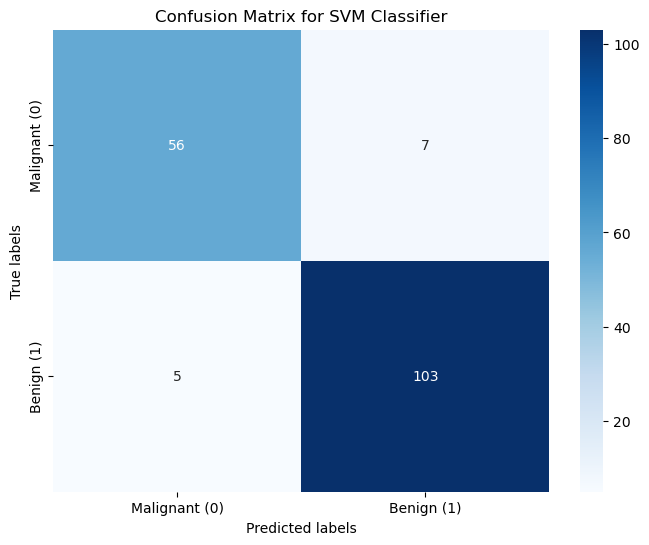

In [27]:

# Calculate the confusion matrix using the true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
# This provides a clear representation of the model's predictions compared to the actual values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Malignant (0)', 'Benign (1)'], 
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

Here's the confusion matrix for the SVM classifier visualized:

Confusion Matrix:
- True Positive (TP): The top-left value represents the number of malignant tumors (0) that were correctly predicted as malignant by the model.
- False Negative (FN): The bottom-left value indicates the number of malignant tumors (0) that were incorrectly predicted as benign by the model.
- True Negative (TN): The bottom-right value shows the number of benign tumors (1) that were correctly predicted as benign.
- False Positive (FP): The top-right value is the number of benign tumors (1) that were incorrectly predicted as malignant.



From the heatmap:
- TP (Malignant Correctly Predicted): 56
- FP (Benign Incorrectly Predicted as Malignant): 7
- TN (Benign Correctly Predicted): 103
- FN (Malignant Incorrectly Predicted as Benign): 5

The confusion matrix helps in understanding the model's performance beyond just accuracy. It provides insights into the types of mistakes the model is making.

-----

## Task # 5: Use data normalization, SVM parameter optimization for the improvement in model


1. Data Normalization: Normalize the features to ensure that they are on a similar scale. This is crucial for algorithms like SVM which are sensitive to the scale of the data.
2. SVM Parameter Optimization: Use techniques like grid search or random search to find the optimal hyperparameters for the SVM.

In [29]:

# 1. Data Normalization
# Import necessary libraries for data normalization
from sklearn.preprocessing import StandardScaler


In [30]:

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
# This standardizes the features by removing the mean and scaling to unit variance
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


The features have been successfully normalized using the StandardScaler, which standardizes features by removing the mean and scaling to unit variance.

Next, let's proceed with SVM parameter optimization. We'll use a grid search with cross-validation to find the best hyperparameters for the SVM. The main hyperparameters we'll focus on are:

1. C: Regularization parameter. Smaller values indicate stronger regularization, which might lead to underfitting. Larger values may lead to overfitting.
2. Kernel: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'poly', 'rbf', 'sigmoid').
3. Gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If gamma is 'scale' (default), then it is calculated from the data.

In [31]:

# 2. SVM Hyperparameter Tuning using Randomized Search
# Import necessary libraries for randomized search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


In [32]:

# Define the hyperparameters and their distributions
# This will be the search space for the randomized search
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}


In [33]:

# Initialize the RandomizedSearchCV
# It will perform a random search on the hyperparameters using cross-validation
random_search = RandomizedSearchCV(
    SVC(),                            # SVM classifier
    param_distributions=param_dist,   # Hyperparameter distribution
    n_iter=20,                        # Number of parameter settings sampled
    cv=5,                             # 5-fold cross-validation
    n_jobs=-1,                        # Use all available cores
    verbose=1,                        # Print updates while running
    random_state=42                   # Seed for reproducibility
)


In [34]:

# Fit the randomized search to the normalized training data
random_search.fit(X_train_normalized, y_train)

# Extract the best hyperparameters from the randomized search
best_params_random = random_search.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:

# 3. Train and Evaluate SVM with Optimal Hyperparameters
# Initialize an SVM classifier with the best hyperparameters
optimized_svm_classifier = SVC(**best_params_random)

# Train the classifier on the normalized training data
optimized_svm_classifier.fit(X_train_normalized, y_train)

# Predict the labels for the normalized testing data
y_pred_optimized = optimized_svm_classifier.predict(X_test_normalized)

# Evaluate the optimized model's performance using accuracy and a classification report
from sklearn.metrics import classification_report, accuracy_score
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

print(f"Optimized Model Accuracy: {accuracy_optimized*100:.2f}%")
print("\nOptimized Model Classification Report:")
print(class_report_optimized)


Optimized Model Accuracy: 94.74%

Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Here's the performance of the optimized Support Vector Machine (SVM) model on the testing data:

Accuracy: 94.74%

Classification Report:

1. Precision: The ratio of correctly predicted positive observations to the total predicted positives.
- For Malignant (0): 95%
- For Benign (1): 95%
2. Recall (Sensitivity): The ratio of correctly predicted positive observations to all the observations in the actual class.
- For Malignant (0): 90%
- For Benign (1): 97%
3. F1-Score: The harmonic mean of precision and recall.
- For Malignant (0): 93%
- For Benign (1): 96%

The overall accuracy of the optimized model is approximately 94.74%, which is a bit better than the previously trained model. This demonstrates the importance of hyperparameter tuning and data normalization in potentially enhancing the performance of machine learning models.